<a href="https://colab.research.google.com/github/Kalpesh1969/ML-Project/blob/main/Sample_ML_Submission_Kalpesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Kalpesh Parikh


# **Project Summary -**

We have given a dataset of Yesbank stock price for the period of 15 years, Jul 05 to Nov 20. This dataset contains month wise four types of stock prices such as open, close, high and low.

Our goal is to find price pattern across all years and find correlation among all prices. Plot various graphs and identify the insight from the graph. From EDA it has been observed that all types of stock prices went constanty raising from year 2005 to 2018 and then it started drop in 2019 and 2020. Reason for sharp down of share price in 2019 was due to finaicial destability of the bank and then RBI took control of the bank in 2020.

We developed machine learning model for many algorithan and found the best fit algoritam is Random Forest and Tree Base model.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Want to predict the future price of Yesbank based on past fifteen years various types of stock prices

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [5]:
# Load Dataset
df = pd.read_csv('/content/Copy of data_YesBank_StockPrices.csv', encoding = 'unicode_escape')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()
null_value = df.isnull()
null_value

,Date,Open,High,Low,Close
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
180,False,False,False,False,False
181,False,False,False,False,False
182,False,False,False,False,False
183,False,False,False,False,False


<Axes: >

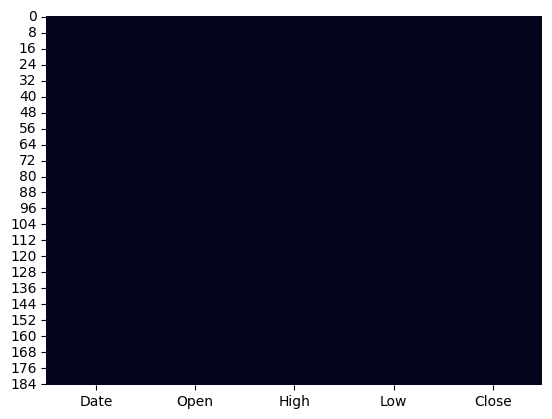

In [11]:
# Visualizing the missing values
# There is neither duplicate nor null value which can be visualized thru heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset contains the Yesbank stock price of last 15 years, starting from Jul 05 to Nov 20. Dataset contains 185 rows and 5 columns. Dataset contains month wise different types of stock prices like open, close, high and low stock price.  

There is neither null values nor duplicate values observed

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe.
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

This dataset contains five columns as described below

date - Shows the month of a particular year like Jul-05 in a textual format

open - Stock's opening price for a particular month

close - Stock's closing price for a particular month

high - Stock's high price reached in a particular month

low - Stock's went to its low price in a particular month

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
dt=df.copy()

In [16]:
# Remove duplicate rows
dt.drop_duplicates(inplace=True)

In [17]:
# number of unique rows after removal of duplicate rows. There is no duplicate rows
uniq_rows = dt.shape[0]
uniq_rows

185

In [18]:
# Date field is splited in Month and Year for better analysis
dt[['Month','Year']]=dt['Date'].str.split('-',expand=True)

In [19]:
dt.head()

,Date,Open,High,Low,Close,Month,Year
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05


In [20]:
# Convert month field into numeric representation of month like Jan=1, Feb=2, etc.
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
dt['month_numeric'] = dt['Month'].map(month_map)
dt.head()

,Date,Open,High,Low,Close,Month,Year,month_numeric
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05,7
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,8
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,9
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,10
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,11


In [21]:
# Convert year field into numeric representation of year
dt['year_numeric'] = dt['Year'].astype(int)

In [22]:
dt['Moving_Average'] = dt['Close'].rolling(window=1).mean()

In [23]:
dt.head()

,Date,Open,High,Low,Close,Month,Year,month_numeric,year_numeric,Moving_Average
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05,7,5,12.46
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,8,5,13.42
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,9,5,13.30
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,10,5,12.99
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,11,5,13.41


In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            185 non-null    object 
 1   Open            185 non-null    float64
 2   High            185 non-null    float64
 3   Low             185 non-null    float64
 4   Close           185 non-null    float64
 5   Month           185 non-null    object 
 6   Year            185 non-null    object 
 7   month_numeric   185 non-null    int64  
 8   year_numeric    185 non-null    int64  
 9   Moving_Average  185 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 14.6+ KB


### What all manipulations have you done and insights you found?

Since there is no duplicate and no null value found in the dataset hence nothing was required to do for data wrangling activity but for a safer side created a new dataframe dt for further activities

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1 Yearly Average of All Types of Stock Prices

In [25]:
# Chart - 1 visualization code
# Want to find yearly average of all types of prices open,close,high,low hence used group by on year
yearly_avg = dt.groupby(['Year'])[['Open','Close','High','Low']].mean().reset_index()
yearly_avg

,Year,Open,Close,High,Low
0,05,13.183333,13.215000,14.423333,12.391667
1,06,18.401667,19.350000,21.090833,16.903333
2,07,35.160833,36.873333,39.743333,31.830000
3,08,31.292500,28.252500,34.330833,23.335000
4,09,26.940833,30.032500,32.678333,24.275833
5,10,57.946667,58.645833,63.508333,53.880833
6,11,58.865000,57.223333,63.341667,52.275833
7,12,70.648333,74.281667,77.577500,67.428333
8,13,82.608333,80.585000,92.748333,72.990833
9,14,100.463333,106.947500,112.439167,94.627500


In [26]:
# We want to reshape the dataset from horizonta to vertial so that graph can be plot for every price types.
# id_vars which is year will remain as it is.
# value_vars which is open,close,high,low will be melted in two column. 1st column will hold the name and 2nd column will hold the value.
# here 1st column which holds the name is var_name and 2nd column which holds the value is value_name
y_melted_dt = yearly_avg.melt(id_vars='Year',value_vars=['Open','Close','High','Low'],var_name='Price Type',value_name='Average Price')
y_melted_dt

,Year,Price Type,Average Price
0,05,Open,13.183333
1,06,Open,18.401667
2,07,Open,35.160833
3,08,Open,31.292500
4,09,Open,26.940833
...,...,...,...
59,16,Low,193.472500
60,17,Low,292.530833
61,18,Low,263.820833
62,19,Low,106.687500


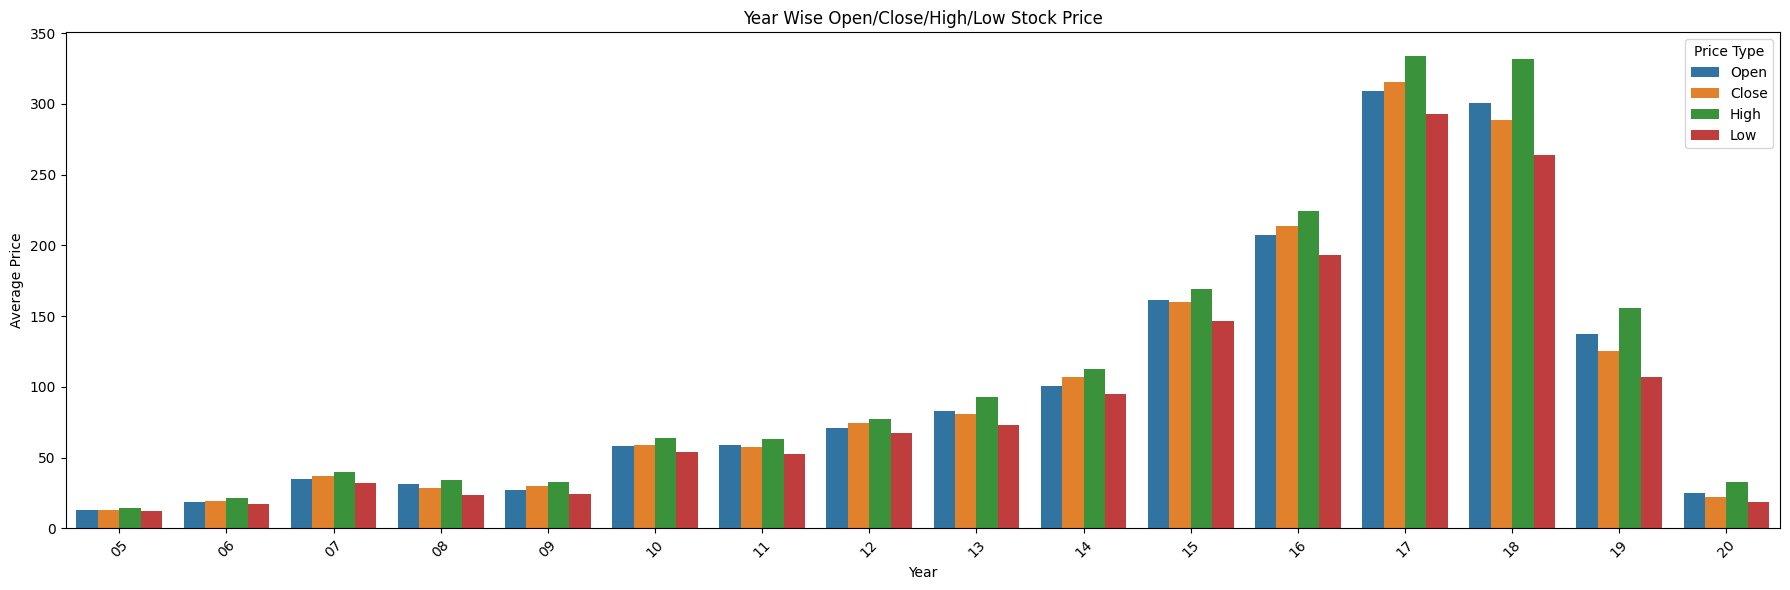

In [27]:
# After reshape of dataset in earlier step we will now plot a countplot graph to show year wise average of all types of stock prices open,close,high,low
plt.figure(figsize=(18,6))
sns.barplot(data=y_melted_dt,x='Year',y='Average Price',hue='Price Type')
plt.title('Year Wise Open/Close/High/Low Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We have 15 years of stock price data for every month. First we would like to see overall trend and data visulizaion for every year before going into the detail

##### 2. What is/are the insight(s) found from the chart?

Since we want to see the data for every year but the dataset contains monthly data so there is a need to find yearly average of all types of stock price. We calculated the average of every year and plotted those data. Here we can see that all types of prices are constantly going up till year 2018 and for last two years 2019 and 2020 there is a declining trend

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After constant raise of last 13 years there is a declining trend for last two years, due to finaicial destability of the bank and then RBI took control of the bank in 2020. Secondly covid padamic came up in 2020 which is also impacted the stock price.

## Chart - 2 Monthly Average of All Types of Stock Prices

In [28]:
# Chart - 2 visualization code
# Want to find monthly average of all types of prices open,close,high,low hence used group by on month
monthly_avg = dt.groupby(['Month'])[['Open','Close','High','Low']].mean().reset_index()
monthly_avg

,Month,Open,Close,High,Low
0,Apr,113.044000,114.450000,125.709333,102.284667
1,Aug,108.481875,103.386875,116.064375,95.777500
2,Dec,100.850000,100.724000,107.654000,92.808000
3,Feb,109.134667,107.760667,116.035333,98.238667
4,Jan,100.928000,108.774667,117.346667,93.766000
5,Jul,103.891250,108.322500,117.493750,96.206250
6,Jun,113.268000,109.661333,118.471333,102.642000
7,Mar,108.150667,113.014000,123.670667,98.524000
8,May,114.589333,112.874667,122.090000,102.404667
9,Nov,97.975000,94.671250,105.645000,87.251875


In [29]:
# We want to reshape the dataset from horizonta to vertial so that graph can be plot for every price types.
# id_vars which is month will remain as it is.
# value_vars which is open,close,high,low will be melted in two column. 1st column will hold the name and 2nd column will hold the value.
# here 1st column which holds the name is var_name and 2nd column which holds the value is value_name
m_melted_dt = monthly_avg.melt(id_vars='Month',value_vars=['Open','Close','High','Low'],var_name='Price Type',value_name='Average Price')
m_melted_dt

,Month,Price Type,Average Price
0,Apr,Open,113.044000
1,Aug,Open,108.481875
2,Dec,Open,100.850000
3,Feb,Open,109.134667
4,Jan,Open,100.928000
5,Jul,Open,103.891250
6,Jun,Open,113.268000
7,Mar,Open,108.150667
8,May,Open,114.589333
9,Nov,Open,97.975000


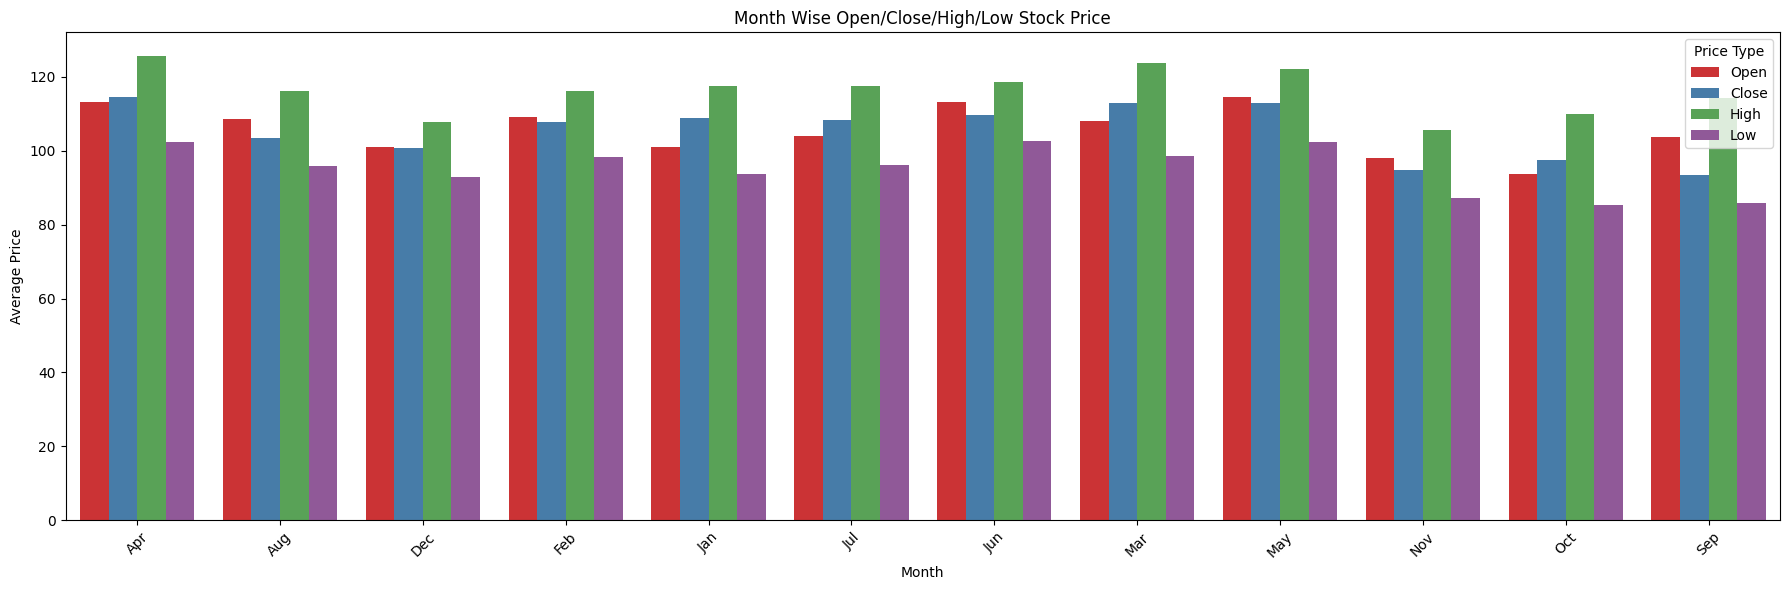

In [30]:
# After reshape of dataset in earlier step we will now plot a countplot graph to show year wise average of all types of stock prices open,close,high,low
plt.figure(figsize=(18,6))
sns.barplot(data=m_melted_dt,x='Month',y='Average Price',hue='Price Type',palette='Set1')
plt.title('Month Wise Open/Close/High/Low Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

In the previous chart 1 we did trend analysis with respect to average price of the entire year to have overall look. Here we wanted to do month wise stock price trend where in we have taken average of each month of all years. We wnted to see whether price changes are happening in a particular month in all years.

##### 2. What is/are the insight(s) found from the chart?

From the above monthly average graph it can be seen that stock prices where high during March,April and May and low during October and November

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As such there is not any significant negative growth observed from the chart, only October and November month has low stock price

## Chart - 3 Histogram/Distribution Chart of Average Open Price

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

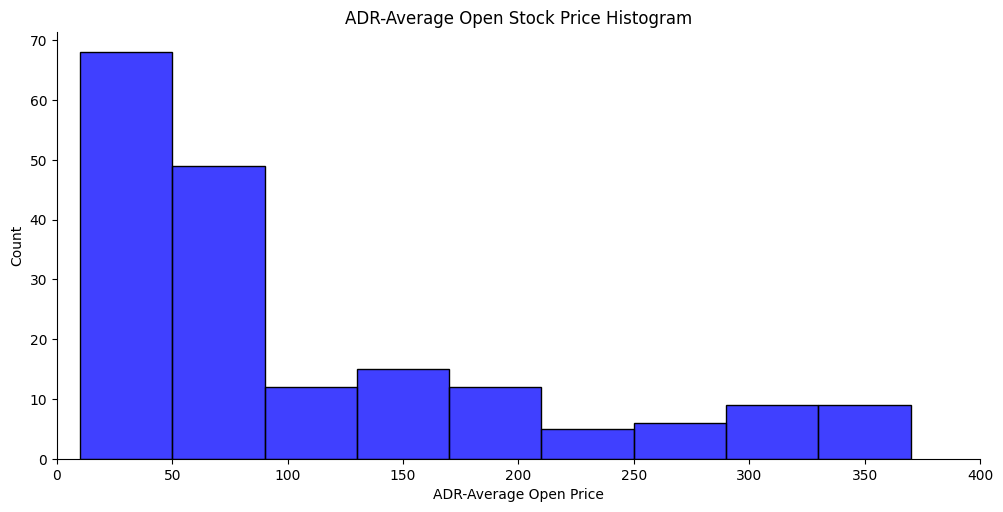

In [31]:
# Chart - 3 visualization code
plt.figure(figsize=(12,6))
sns.displot(dt['Open'], height=5, aspect=2.0, color='blue')
plt.xlim(0,400)
plt.title('ADR-Average Open Stock Price Histogram')
plt.xlabel('ADR-Average Open Price')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

In order to determine which price range is contributing more and which is contributing less, we now wanted to conduct more analysis on each sort of price and examine how the prices are distributed within a range. We want to perform an analysis for the open stock price here.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the price range of 0-80 contributes the highest dispersion, while the price range of 225-275 contributes the lowest. The price fluctuated between 0 and 80 at its maximum and between 225 and 275 at its minimum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the pricing range of 225–275 has a comparatively high price with little occurrence, the price range of 0-80 has the highest distribution and the lowest price. This indicates that one can purchase the stock when the price is between 0 and 80, and it is appropriate to sell when it is between 225 and 275

## Chart - 4. Histogram/Distribution Chart of Average Close Price

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

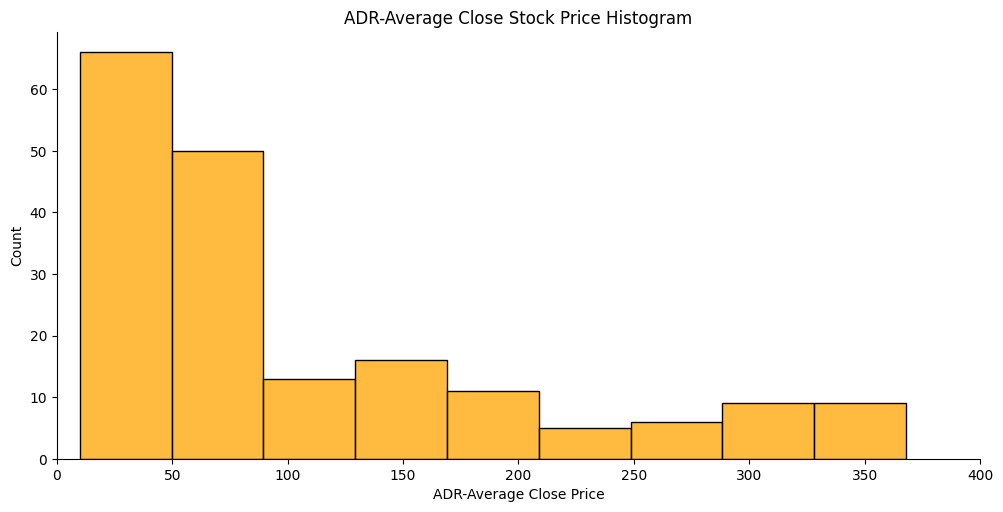

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
sns.displot(dt['Close'], height=5, aspect=2.0, color='orange')
plt.xlim(0,400)
plt.title('ADR-Average Close Stock Price Histogram')
plt.xlabel('ADR-Average Close Price')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

In order to determine which price range is contributing more and which is contributing less, we now wanted to conduct more analysis on each sort of price and examine how the prices are distributed within a range. We want to perform an analysis for the close stock price here.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the price range of 0-80 contributes the highest dispersion, while the price range of 225-275 contributes the lowest. The price fluctuated between 0 and 80 at its maximum and between 225 and 275 at its minimum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the pricing range of 225–275 has a comparatively high price with little occurrence, the price range of 0-80 has the highest distribution and the lowest price. This indicates that one can purchase the stock when the price is between 0 and 80, and it is appropriate to sell when it is between 225 and 275

## Chart - 5 Histogram/Distribution Chart of Average High Price

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

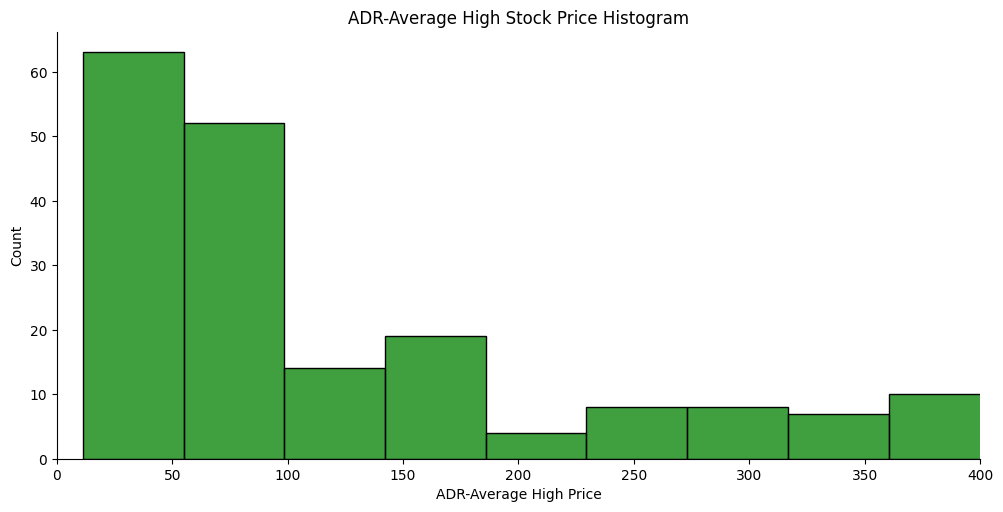

In [33]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
sns.displot(dt['High'], height=5, aspect=2.0, color='green')
plt.xlim(0,400)
plt.title('ADR-Average High Stock Price Histogram')
plt.xlabel('ADR-Average High Price')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

In order to determine which price range is contributing more and which is contributing less, we now wanted to conduct more analysis on each sort of price and examine how the prices are distributed within a range. We want to perform an analysis for the close stock price here.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the price range of 0-100 contributes the highest dispersion, while the price range of 180-225 contributes the lowest. The price fluctuated between 0 and 100 at its maximum and between 180 and 225 at its minimum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the pricing range of 180-225 has a comparatively high price with little occurrence, the price range of 0-100 has the highest distribution and the lowest price. This indicates that one can purchase the stock when the price is between 0 and 100, and it is appropriate to sell when it is between 180 and 225

## Chart - 6 Histogram/Distribution Chart of Average Low Price

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

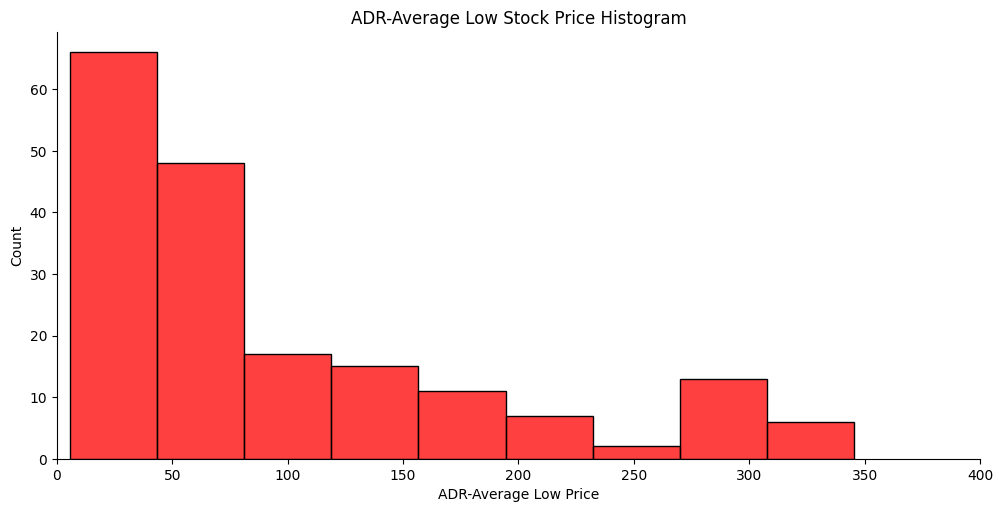

In [34]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
sns.displot(dt['Low'], height=5, aspect=2.0, color='red')
plt.xlim(0,400)
plt.title('ADR-Average Low Stock Price Histogram')
plt.xlabel('ADR-Average Low Price')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

In order to determine which price range is contributing more and which is contributing less, we now wanted to conduct more analysis on each sort of price and examine how the prices are distributed within a range. We want to perform an analysis for the close stock price here.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the price range of 0-80 contributes the highest dispersion, while the price range of 230-260 contributes the lowest. The price fluctuated between 0 and 80 at its maximum and between 230 and 260 at its minimum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the pricing range of 230-260 has a comparatively high price with little occurrence, the price range of 0-80 has the highest distribution and the lowest price. This indicates that one can purchase the stock when the price is between 0 and 80, and it is appropriate to sell when it is between 230 and 260

## Chart - 7 Correlation Heatmap

In [35]:
# Chart - 7 visualization code
close_price = dt[['year_numeric','month_numeric','Open','Close','High','Low']].corr()
close_price_corr=close_price.corr()
close_price_corr

,year_numeric,month_numeric,Open,Close,High,Low
year_numeric,1.000000,-0.903150,0.682801,0.675675,0.694222,0.664899
month_numeric,-0.903150,1.000000,-0.928982,-0.926387,-0.934852,-0.920738
Open,0.682801,-0.928982,1.000000,0.999305,0.999799,0.999225
Close,0.675675,-0.926387,0.999305,1.000000,0.999254,0.999852
High,0.694222,-0.934852,0.999799,0.999254,1.000000,0.998839
Low,0.664899,-0.920738,0.999225,0.999852,0.998839,1.000000


In [36]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


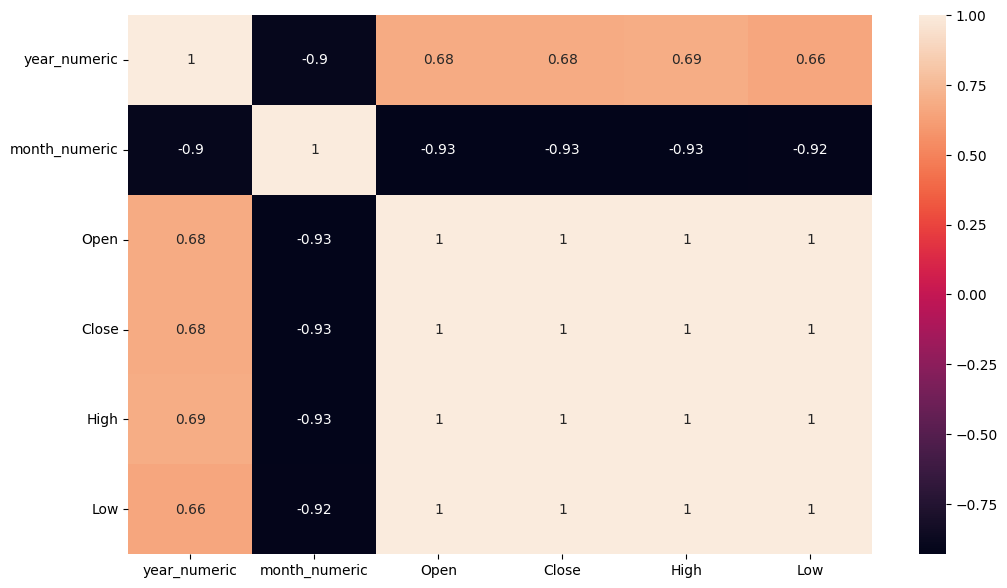

In [37]:
cor = close_price.corr()
plt.figure(figsize=(12,7))
plot=sns.heatmap((cor).round(2), annot=True)

##### 1. Why did you pick the specific chart?

We wanted to see the co-relation among different attributes with regards to various stock prices. Want to understand if any one attributes is affecting to other or not. Some of important attributes are selected to plot this graph.

##### 2. What is/are the insight(s) found from the chart?

We have taken four types of stock prices that is open, close, high, low. Here we can see. very close relation among all these four types of prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen very close correlation among all four types of stock prices which indicates that very low price flctuation and volatility among all four types of prices

#### Chart - 8

Text(13.819444444444445, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

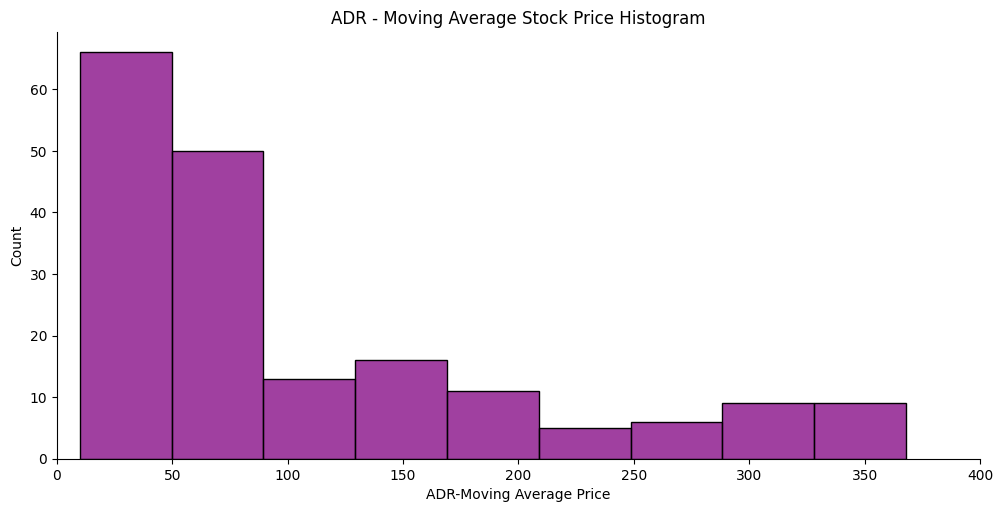

In [38]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.displot(dt['Moving_Average'], height=5, aspect=2.0, color='purple')
plt.xlim(0,400)
plt.title('ADR - Moving Average Stock Price Histogram')
plt.xlabel('ADR-Moving Average Price')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

We have already performed price distribution of all types of stock price and understand the pattern. Now we want to perform similar price distribution analysis for moving average because moving average is one of the important price factore in stock market.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the price range of 0-80 contributes the highest dispersion, while the price range of 230-260 contributes the lowest. The price fluctuated between 0 and 80 at its maximum and between 230 and 260 at its minimum. This is the similar pattern found which has been observed for other prices

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the pricing range of 230-260 has a comparatively high price with little occurrence, the price range of 0-80 has the highest distribution and the lowest price. This indicates that one can purchase the stock when the price is between 0 and 80, and it is appropriate to sell when it is between 230 and 260.

#### Chart - 9

In [39]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [40]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [41]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [42]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [43]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [44]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [45]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
num_features = dt.describe().columns
num_features

Index(['Open', 'High', 'Low', 'Close', 'month_numeric', 'year_numeric',
       'Moving_Average'],
      dtype='object')

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have not seen any missing values in the dataset

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers seen

### 3. Categorical Encoding

##### Encode your categorical columns
##### Date field is an object contais month and year as Mon-YY like Jul-05. Its splitted and made two
##### separate another column of Month and Year as numeric field also we kept original fields as it is. All these activities done previous steps

In [48]:
dt.head()


,Date,Open,High,Low,Close,Month,Year,month_numeric,year_numeric,Moving_Average
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05,7,5,12.46
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,8,5,13.42
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,9,5,13.30
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,10,5,12.99
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,11,5,13.41


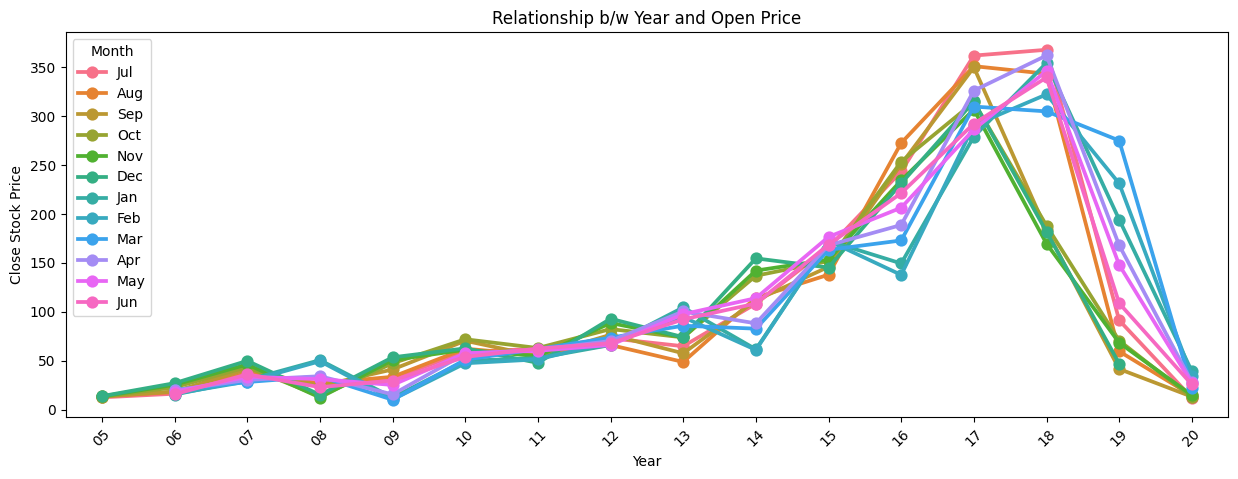

In [49]:
plt.figure(figsize=(15,5))
sns.pointplot(x='Year',y='Close',data=dt,hue='Month')
plt.title('Relationship b/w Year and Open Price')
plt.ylabel('Close Stock Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

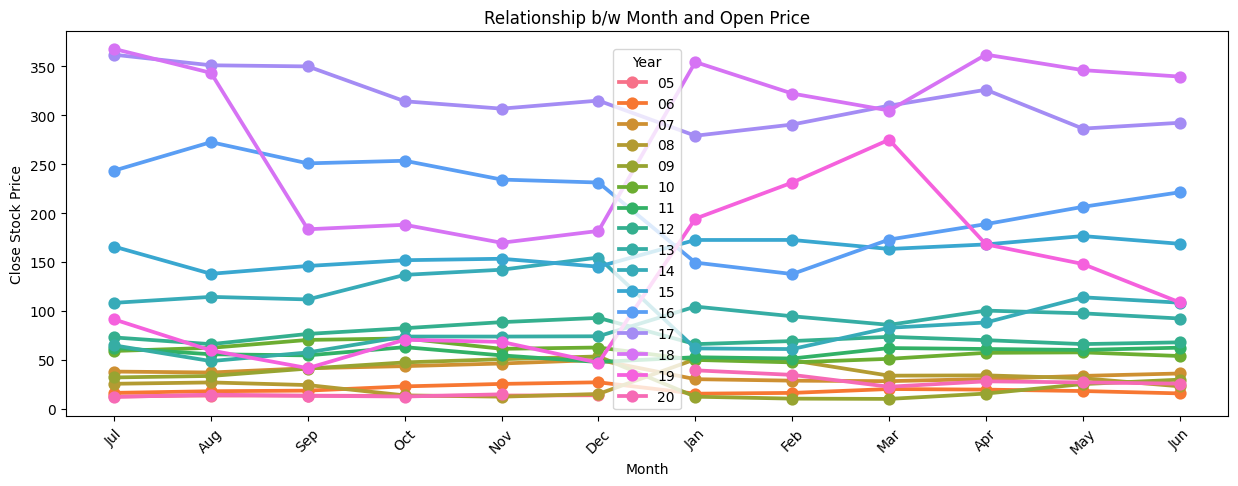

In [50]:
plt.figure(figsize=(15,5))
sns.pointplot(x='Month',y='Close',data=dt,hue='Year')
plt.title('Relationship b/w Month and Open Price')
plt.ylabel('Close Stock Price')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Label Encoding
# Converts categorical columns in dt into one-hot encoded (binary) columns.
dt = pd.get_dummies(dt,drop_first=True,sparse=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 217 entries, Open to Year_20
dtypes: Sparse[bool, False](210), float64(5), int64(2)
memory usage: 12.8 KB


In [52]:
dt.head()

,Open,High,Low,Close,month_numeric,year_numeric,Moving_Average,Date_Apr-07,Date_Apr-08,Date_Apr-09,...,Year_11,Year_12,Year_13,Year_14,Year_15,Year_16,Year_17,Year_18,Year_19,Year_20
0,13.00,14.00,11.25,12.46,7,5,12.46,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12.58,14.88,12.55,13.42,8,5,13.42,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13.48,14.87,12.27,13.30,9,5,13.30,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13.20,14.47,12.40,12.99,10,5,12.99,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.35,13.88,12.88,13.41,11,5,13.41,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding done for date field containing month and year information.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data

### 6. Data Scaling

In [67]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = dt.drop('Close',axis = 1)
y = dt['Close']

In [70]:
dt.head()

,Open,High,Low,Close,month_numeric,year_numeric,Moving_Average,Date_Apr-07,Date_Apr-08,Date_Apr-09,...,Year_11,Year_12,Year_13,Year_14,Year_15,Year_16,Year_17,Year_18,Year_19,Year_20
0,13.00,14.00,11.25,12.46,7,5,12.46,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12.58,14.88,12.55,13.42,8,5,13.42,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13.48,14.87,12.27,13.30,9,5,13.30,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13.20,14.47,12.40,12.99,10,5,12.99,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.35,13.88,12.88,13.41,11,5,13.41,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler

In [74]:
scal = StandardScaler()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtyp

##### What data splitting ratio have you used and why?

Here we have used 80:20 ratio as train:test as our dataset voolume is not much high, there is no outliers, and no of features are also very less

## ***7. ML Model Implementation***

### ML Model - 1

#### Import Dependency

In [75]:
# ML Model - 1 Implementation
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Fit the Algorithm

# Predict on the model

**Create a function for scores**

In [76]:
# Appending all models parameters to the corrosponding list
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')



  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 1.0
MAE : 16.86932071102753
MSE : 485.6619223522759
RMSE : 22.03773859433576
R2 : 0.9462694014007729
Adjusted R2 :  1.0107461197198455 

********************************************************************************
coefficient 
 [ 1.51588291e+01  1.56158767e+01  1.66786566e+01 -1.59010299e+00
  6.97803771e+00  1.70280631e+01 -8.96888825e-01 -6.55167636e-01
 -4.44089210e-16 -5.42163627e-01 -1.38777878e-15 -8.21450855e-01
  4.39148379e-01 -5.65182984e-01 -6.66133815e-16  7.97205046e-01
  3.25745643e+00  5.94342876e+00 -1.77635684e-15 -1.38383056e+00
 -1.58843128e+00 -6.97215954e-01 -5.49009544e-01 -7.24430391e-01
 -7.11015434e-01 -3.99626911e-01 -6.86881521e-01 -8.48550860e-01
 -2.22044605e-16  4.60663714e-01 -4.29682769e-01  3.61213253e+00
  3.44485576e+00  3.09384565e+00 -2.45874950e+00 -1.72056160e+00
 -1.38305493e+00 -2.60903820e-01  2.01948392e-28 -8.17906737e-01
  6.49141749e-02 -1.49661127e-01 -8.53341462e-01  3.87332604e-01
 -4.30514778e-01  1.26217745e-28  3

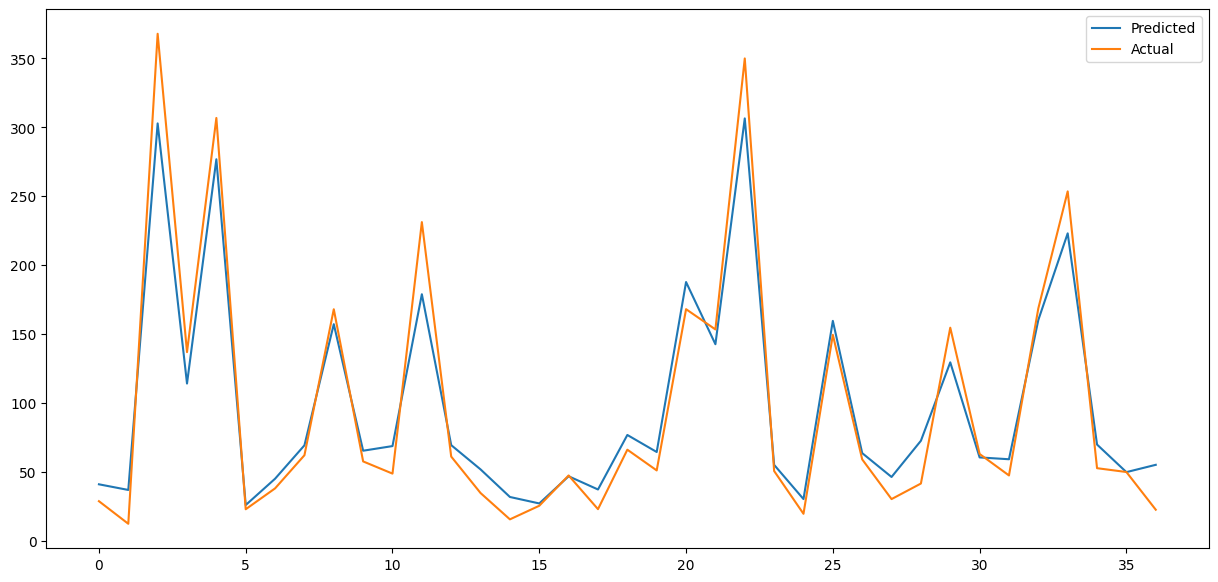

In [77]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [78]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+02, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+02, tolerance: 1.156e

Training score  = 0.9998976481761914
MAE : 0.8042392412850357
MSE : 0.9060793465089653
RMSE : 0.9518820024083685
R2 : 0.9998997570461556
Adjusted R2 :  1.0000200485907689 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


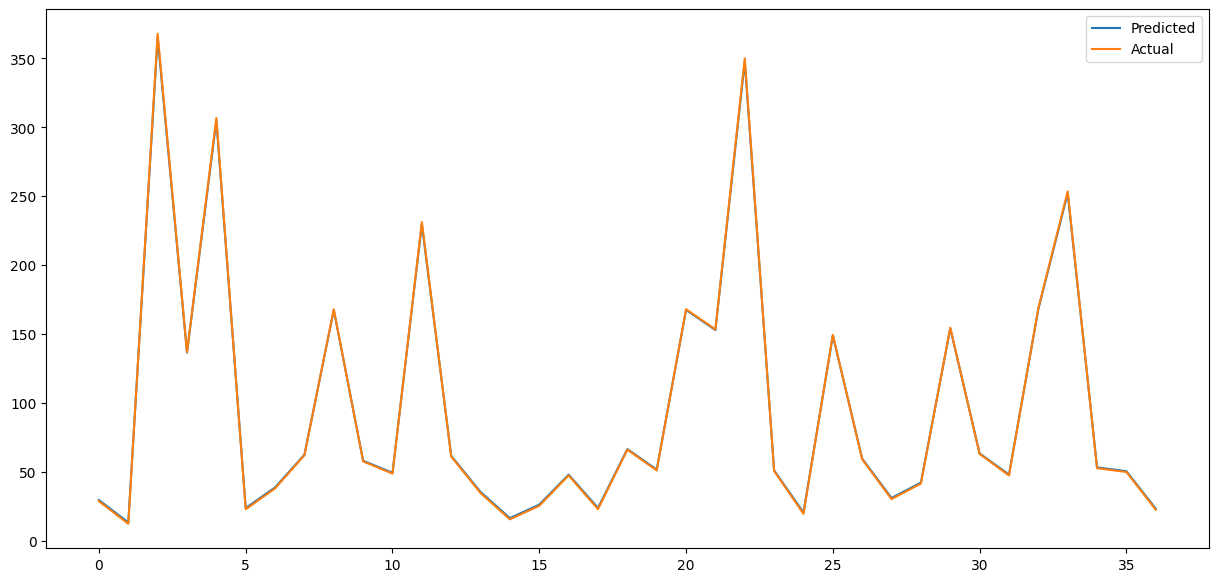

In [79]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Training score  = 1.0
MAE : 16.869320711027452
MSE : 485.6619223522712
RMSE : 22.037738594335654
R2 : 0.9462694014007734
Adjusted R2 :  1.0107461197198453 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


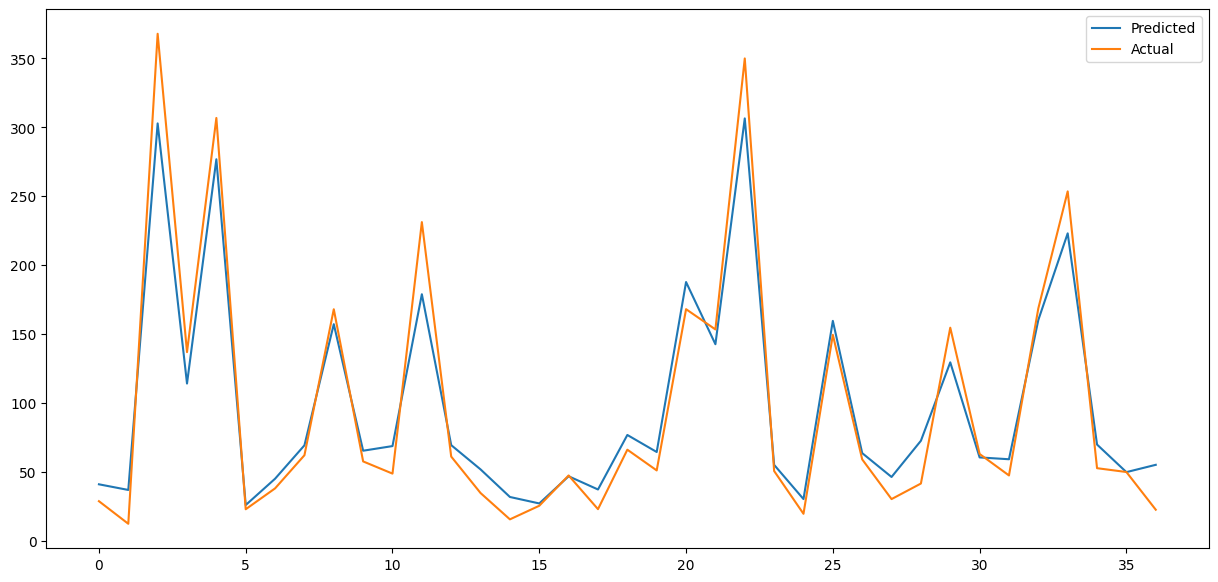

In [80]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [81]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

#### **LinearRegression**

Training score  = 1.0
MAE : 68.7458357385308
MSE : 6467.840186905256
RMSE : 80.42288347793341
R2 : 0.28443860040878177
Adjusted R2 :  1.0010907486296008 

********************************************************************************
coefficient 
 [-4.99600361e-16  4.36566463e-01  4.41205839e-01 ...  7.86355688e-02
  2.02806325e-02 -3.71578039e-01]


Intercept  =  98.09722888640985


******************** ploting the graph of Actual and predicted only with 80 observation ********************


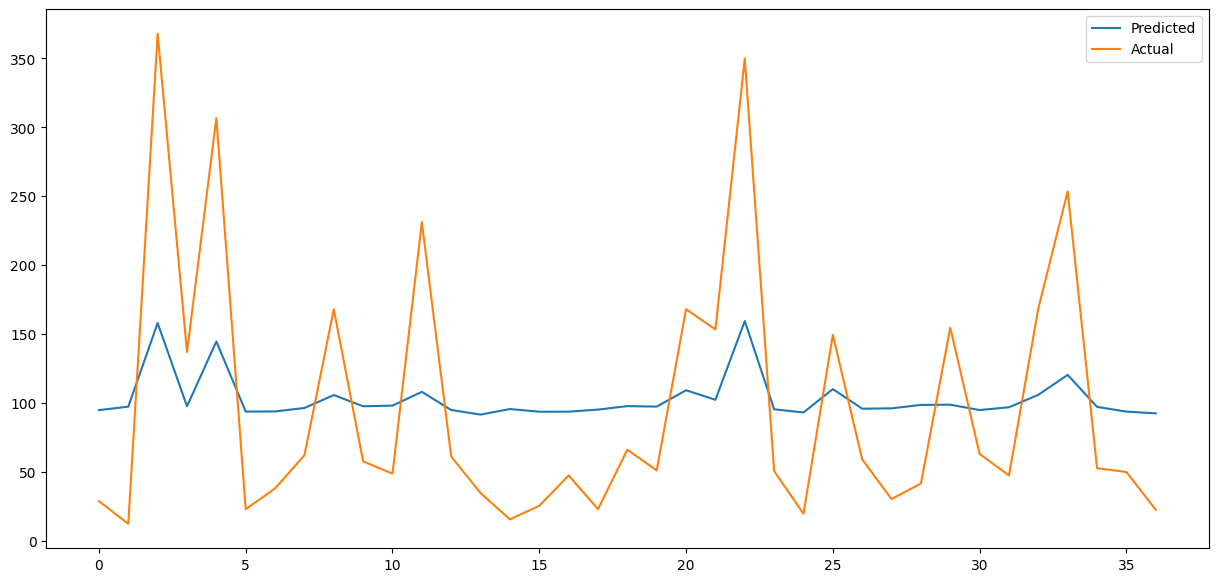

In [82]:
score_metrix(LinearRegression(), x_train_poly,x_test_poly,y_train,y_test)

### **Train Test split for Tree Base Models**
**because multicollinearty not effect tree base models**

Training score  = 1.0
MAE : 3.9000000000000012
MSE : 50.63785405405405
RMSE : 7.11602796889206
R2 : 0.994397744429033
Adjusted R2 :  1.0011204511141933 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


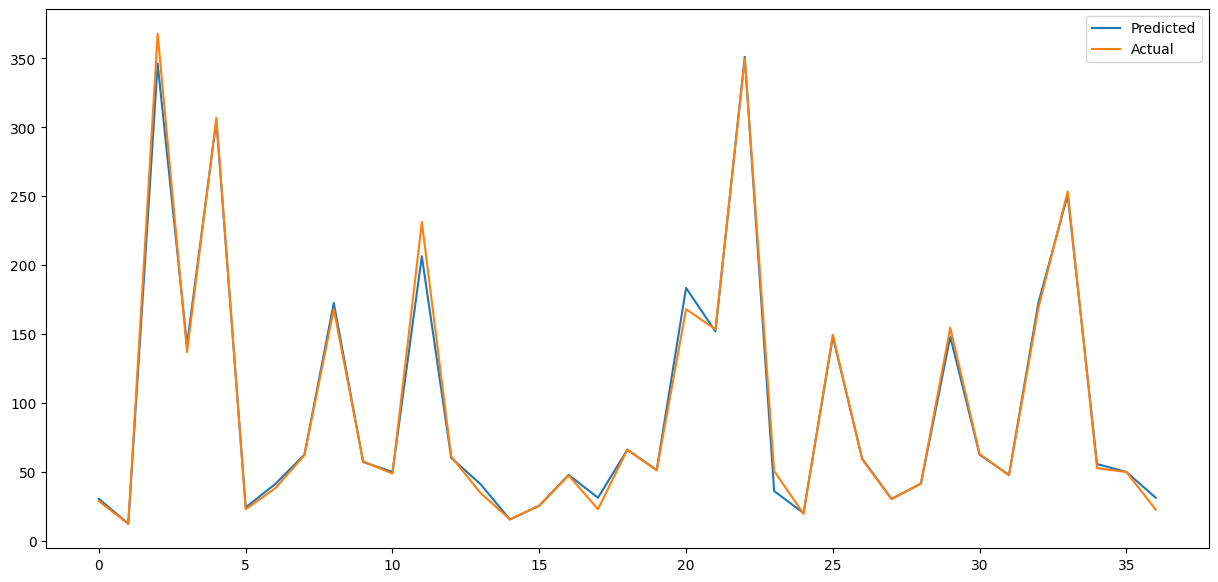

In [83]:
d_tree = DecisionTreeRegressor()
score_metrix(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

Training score  = 0.999494130478914
MAE : 4.008527027027032
MSE : 50.87118255594628
RMSE : 7.1324037011337404
R2 : 0.9943719304224166
Adjusted R2 :  1.0011256139155167 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


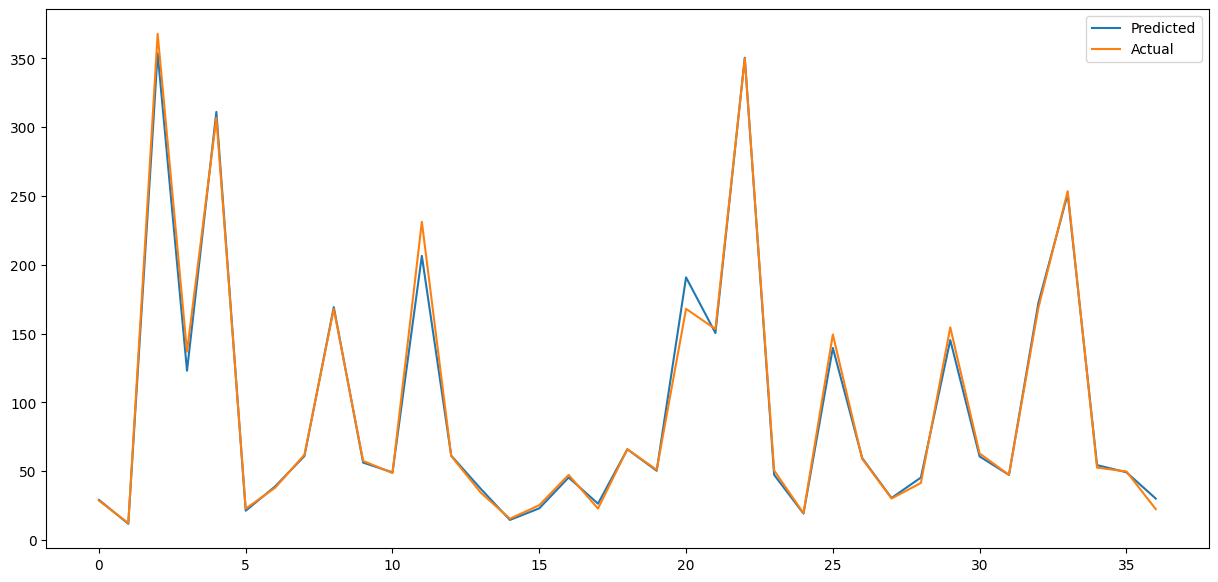

In [84]:
score_metrix(RandomForestRegressor(),x_train,x_test,y_train,y_test)

### **Gradient Boosting Regressor**

Training score  = 0.9999982710445002
MAE : 2.0434371721122875
MSE : 16.421176662995606
RMSE : 4.052305104874954
R2 : 0.9981832636836486
Adjusted R2 :  1.0003633472632703 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


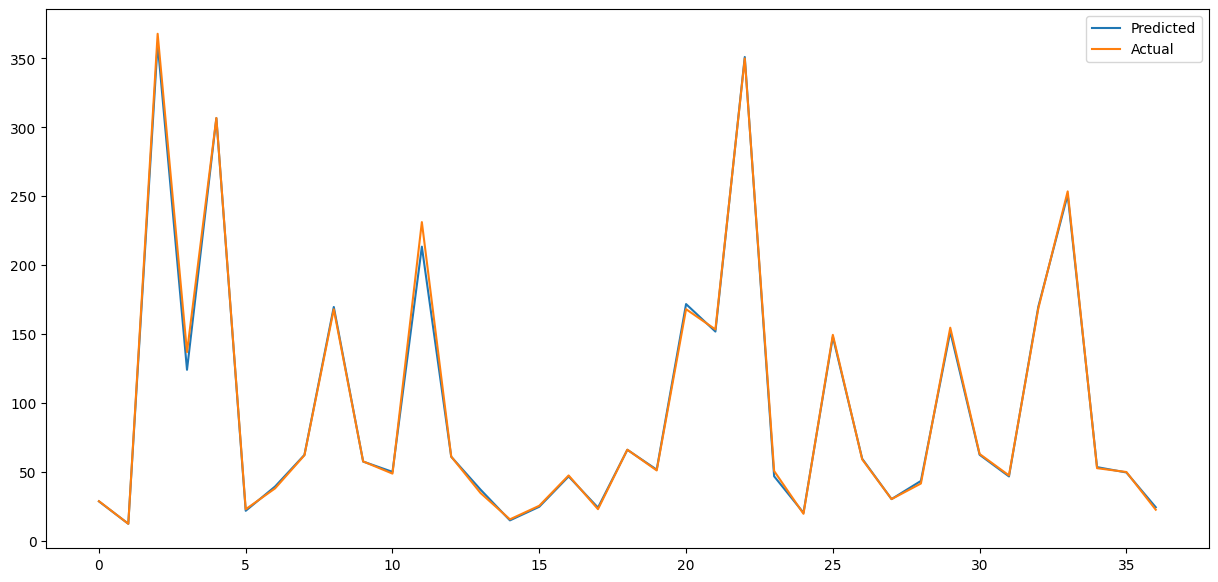

In [85]:
score_metrix(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

### **Adaboost Boost Regressor**

Training score  = 0.997357862153847
MAE : 5.070135745002818
MSE : 69.11888690947814
RMSE : 8.313776934070226
R2 : 0.9923531185023299
Adjusted R2 :  1.001529376299534 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


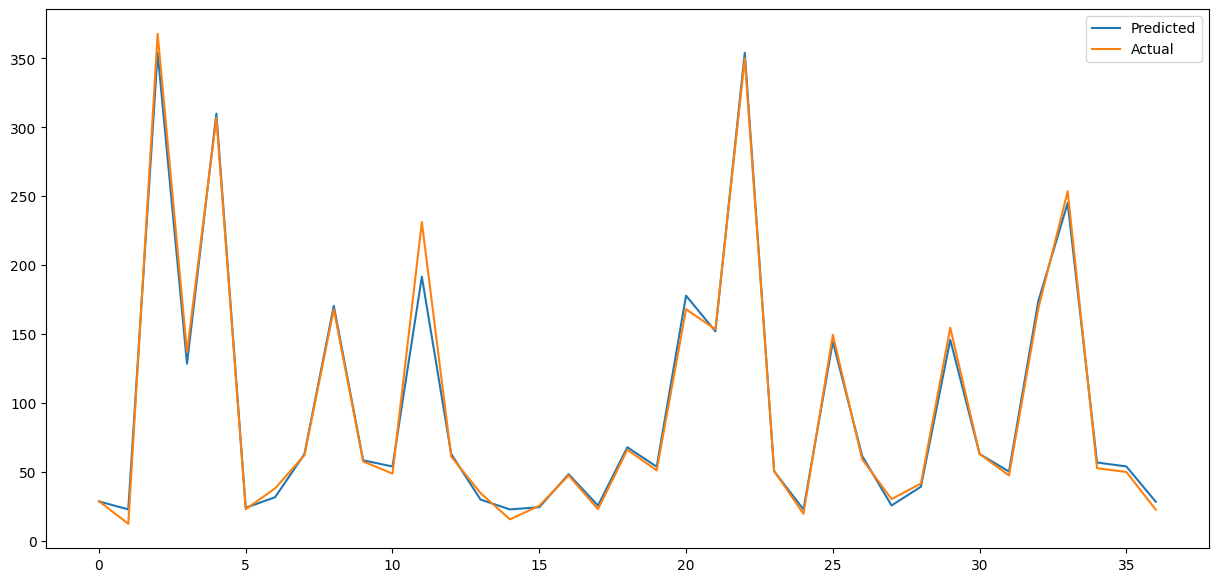

In [86]:
score_metrix(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

### **KNN Regressor**

Training score  = 0.9696023246327689
MAE : 14.589351351351356
MSE : 446.2343034594596
RMSE : 21.124258648754033
R2 : 0.950631426642926
Adjusted R2 :  1.0098737146714147 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


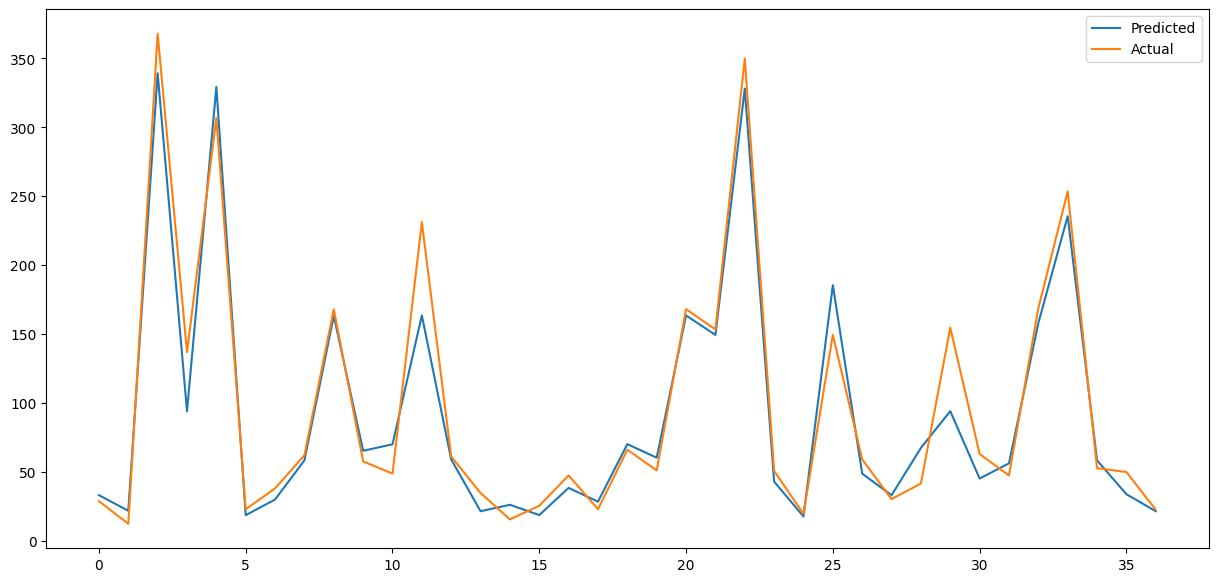

In [87]:
score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [92]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***